In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import string 
import nltk 
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('Twitter_Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    return input_txt

In [5]:
df['Cleaned_Tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")
df.head()

,id,label,tweet,Cleaned_Tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [6]:
df['Cleaned_Tweet']=df['Cleaned_Tweet'].str.replace ("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,Cleaned_Tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
df['Cleaned_Tweet']=df['Cleaned_Tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,Cleaned_Tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [9]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

from nltk.stem.porter import PorterStemmer 
stemmer =PorterStemmer()


# Apply the function to remove emojis
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(remove_emojis)

# Remove non-ASCII characters
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

# Continue with previous steps
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))


tokenized_tweet = df['Cleaned_Tweet'].apply(lambda x: x.split())
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['Cleaned_Tweet'] = tokenized_tweet

# Display the dataframe
print(df.head())


   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                       Cleaned_Tweet  
0  when father dysfunct selfish drag kid into dys...  
1  thank #lyft credit can't caus they don't offer...  
2                                bihday your majesti  
3                   #model love take with time ur!!!  
4                         factsguide: societi #motiv  


In [10]:
tokenized_tweet =df['Cleaned_Tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3              [#model, love, take, with, time, ur!!!]
4                       [factsguide:, societi, #motiv]
Name: Cleaned_Tweet, dtype: object

In [11]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])

df['Cleaned_Tweet']=tokenized_tweet
df.head()

,id,label,tweet,Cleaned_Tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time ur!!!
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


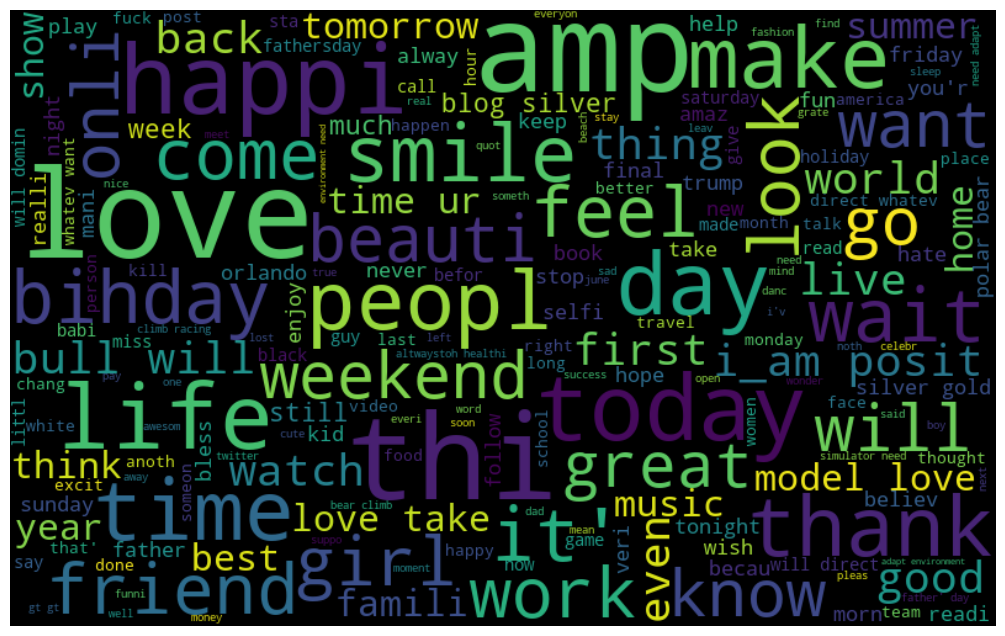

In [12]:
all_words="".join(sentence for sentence in df['Cleaned_Tweet'])
from wordcloud import WordCloud 
wordcloud=WordCloud( width=800, height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize= (15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show ()

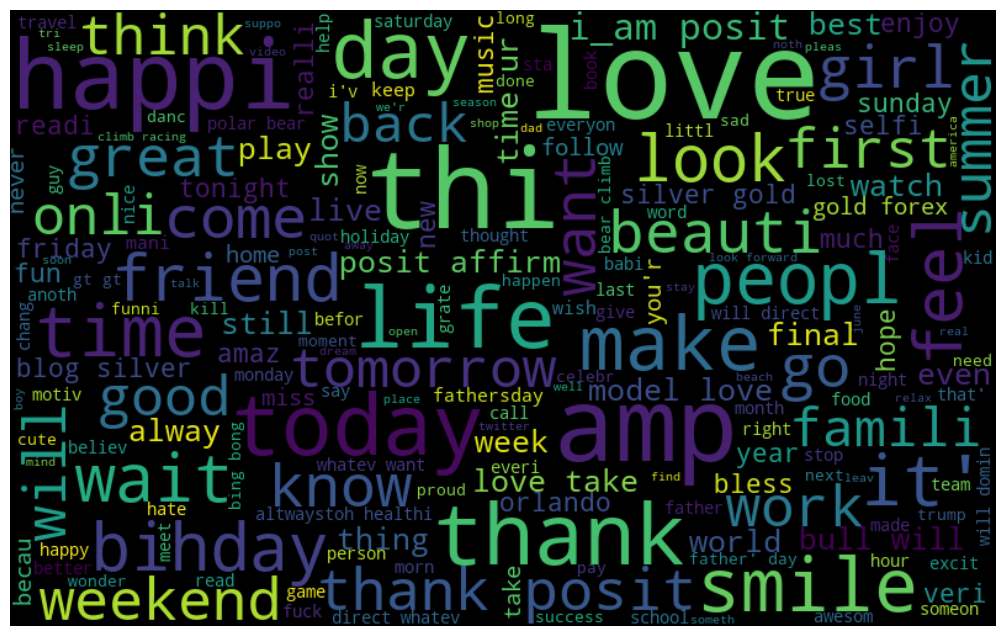

In [13]:
all_words = " ".join([sentence for sentence in df['Cleaned_Tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

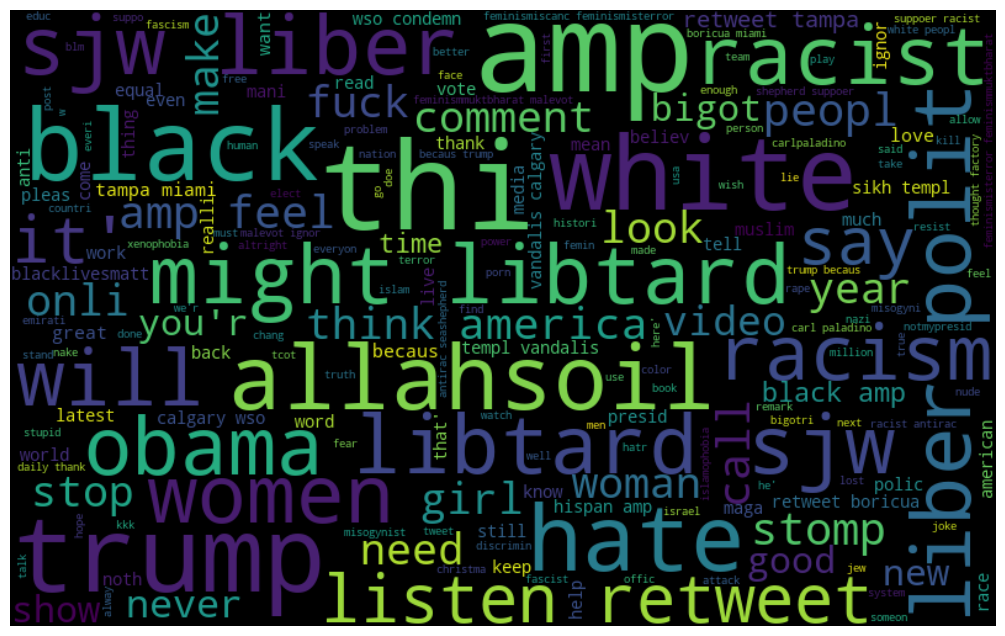

In [14]:

# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['Cleaned_Tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags  

In [16]:
ht_positive = hashtag_extract(df['Cleaned_Tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['Cleaned_Tweet'][df['label']==1])

# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [17]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [18]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


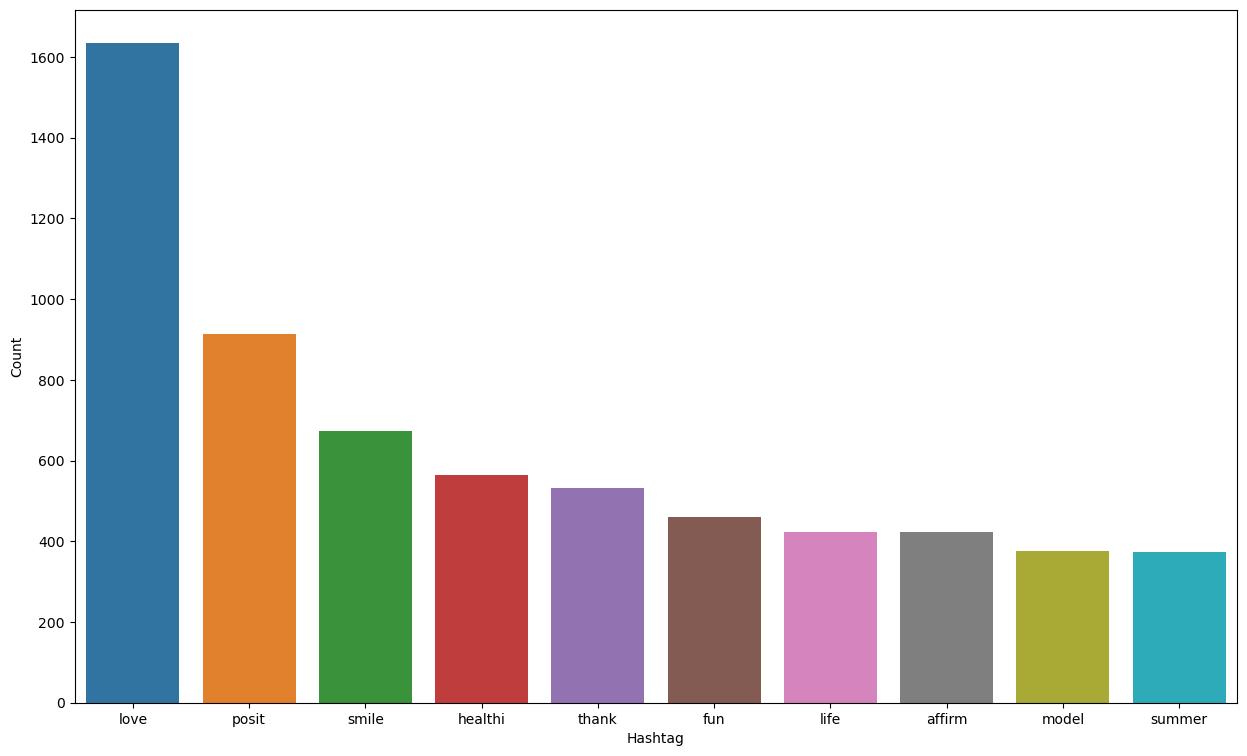

In [19]:

d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [20]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


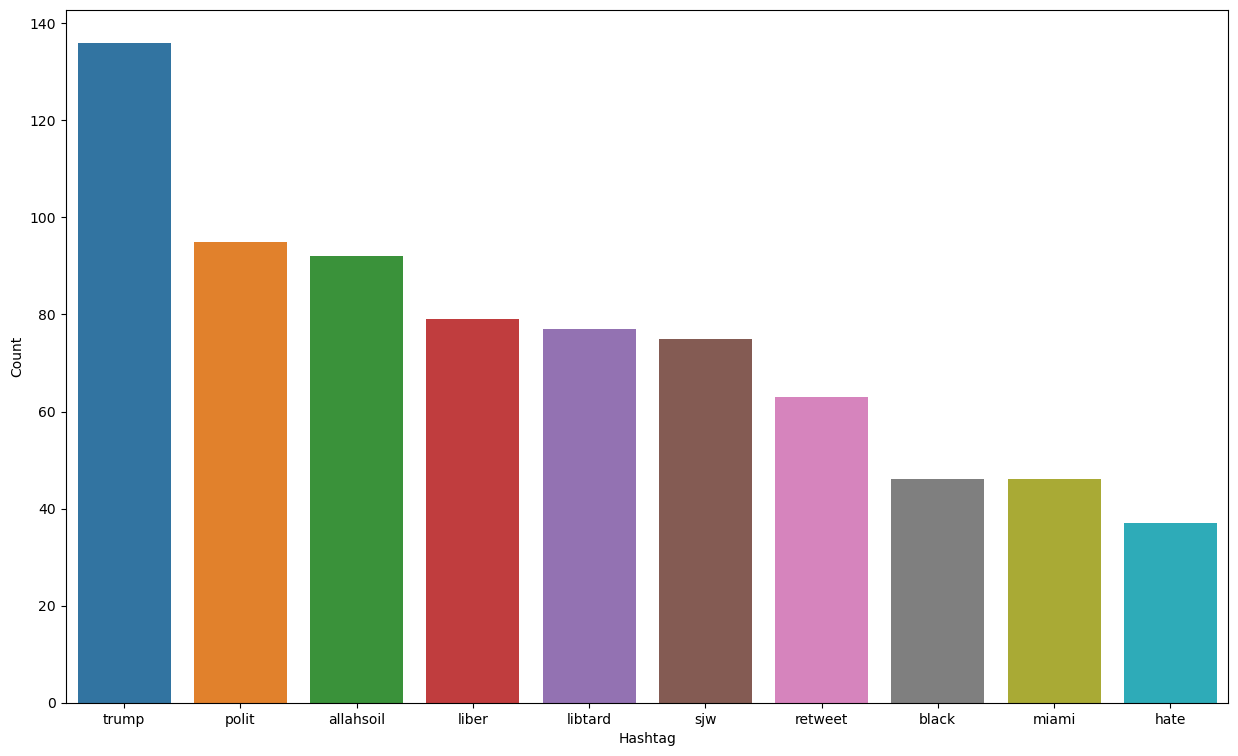

In [21]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [22]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['Cleaned_Tweet'])

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [24]:
import xgboost as xgb 
from sklearn.metrics import f1_score, accuracy_score

In [25]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [26]:
pred = xgb_model.predict(x_test)

In [27]:
f1 = f1_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)

print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

F1 Score: 0.49570552147239266
Accuracy Score: 0.948567138030284
